In [13]:
from hcmus.core import appconfig

In [14]:
from loguru import logger
from hcmus.data import COCODatasetMerger

### Keep SKU110k for Train, IID for Val + Test, treat `object` as label

In [16]:
split_weights = {
    'train': {'weight1': 0.5, 'weight2': 1},
    'val': {'weight1': 1, 'weight2': 0.0},
    'test': {'weight1': 1, 'weight2': 0.0}
}
merger = COCODatasetMerger(
    "/Volumes/Cucumber/Projects/datasets/curated/hcmus-iid-object",
    "/Volumes/Cucumber/Projects/datasets/curated/sku110k-zoom",
    "/Volumes/Cucumber/Projects/datasets/process/2025-07-18/sku110k-only",
    split_weights
)

num_classes, categories = merger.merge_datasets()
logger.info(f"Dataset merged successfully!")
logger.info(f"Number of classes: {num_classes}")
logger.info(f"Categories: {[cat['name'] for cat in categories]}")

2025-07-18 13:29:16.403 | INFO     | hcmus.data._coco_merger:__init__:37 - Splits to merge: dict_keys(['train', 'val', 'test'])
2025-07-18 13:29:16.408 | INFO     | hcmus.data._coco_merger:__init__:38 - Split weights: {'train': {'weight1': 0.5, 'weight2': 1}, 'val': {'weight1': 1, 'weight2': 0.0}, 'test': {'weight1': 1, 'weight2': 0.0}}
2025-07-18 13:29:16.411 | INFO     | hcmus.data._coco_merger:merge_datasets:47 - Starting dataset merging...
2025-07-18 13:29:16.413 | INFO     | hcmus.data._coco_merger:_analyze_categories:69 - Analyzing categories from both datasets...
2025-07-18 13:29:19.317 | INFO     | hcmus.data._coco_merger:_analyze_categories:93 - Found 1 unique categories
2025-07-18 13:29:19.317 | INFO     | hcmus.data._coco_merger:_analyze_categories:94 - Total classes (including background): 2
2025-07-18 13:29:19.375 | INFO     | hcmus.data._coco_merger:_merge_split:114 - Merging train split...
2025-07-18 13:29:19.375 | INFO     | hcmus.data._coco_merger:_merge_split:120 - Us

In [20]:
import json
from hcmus.utils.viz_utils import draw_boxes
from PIL import Image, ImageOps
from hcmus.utils import viz_utils
dataset_dir = "/Volumes/Cucumber/Projects/datasets/process/2025-07-18/sku110k-only"
split_name = "train"
annotations_path = f"{dataset_dir}/{split_name}/annotations_{split_name}.json"
images_path = f"{dataset_dir}/{split_name}/images"
annotations = json.load(open(annotations_path))

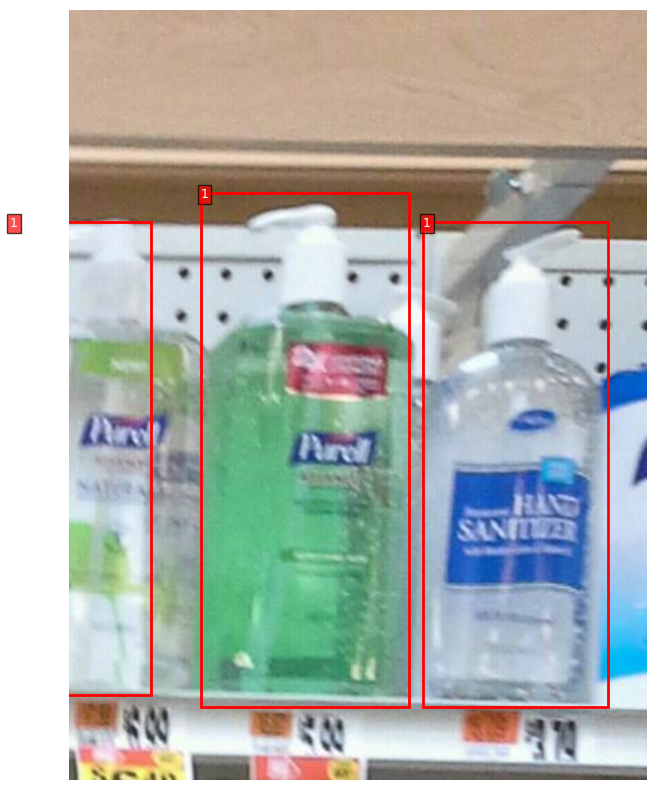

In [22]:
idx = 8200
image_idx = annotations.get("images")[idx]
image_path = images_path + "/" + image_idx.get("file_name")
image = Image.open(image_path)
image = ImageOps.exif_transpose(image)
boxes = []
labels = []
for a in annotations.get("annotations"):
    if a.get("image_id") == image_idx.get("id"):
        bbox = a.get("bbox")
        bbox[2] = bbox[0] + bbox[2]
        bbox[3] = bbox[1] + bbox[3]
        boxes.append(bbox)
        labels.append(str(a.get("category_id")))
viz_utils.draw_boxes(image, boxes, labels)